# Uygulama Notları: 5.5 + π
## FİZ220 - Bilgisayar Programlama II | 05/06/2020

**Lineer Cebir Uygulamaları & Grafik Çizimi (II)**

* 3\. Yaylar ve <strike>insanlar</strike> kütleler
   * Nedir bizim sorunumuz?
   * Diagonalize this!..
   * Yaylar (Rebooted)
     * Ödev #4
   * Dipten ve derinden
   * Normal Koordinatlar / Modlar
   * Hız analizi
   * Grafikler
   * Asıl Grafikler, Simülasyon, vs.
   
   
Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

# Köşegenleştirme

Lineer cebirde "köşegenleştirme", denklem çözümü açısından çok büyük bir öneme sahiptir zira bir denklemi (daha doğru bir ifadeyle _denklemin katsayılarını_) temsil eden bir matrisi köşegenleştirmeyi başarabilirsek, o zaman denklemlerde iç içe geçmiş bilinmeyenler yerine, her birinde sadece bir (yeni) bilinmeyenin olduğu denklemler seti haline getirmiş olur. Yazıyla yazınca karışık gibi duruyor ama uygulama üzerinde görünce daha anlaşılır olacağını umut ediyorum. 

Elimizde diyelim ki bir

$$A=\begin{pmatrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{pmatrix}$$ 

matrisi olsun; eğer bu matrisi uygun bir $u$ matrisi bulup da, bir 

$$u^{-1}\cdot A\cdot u = D$$ 

dönüşümü ile:

$$D=\begin{pmatrix}d_{11}&0\\0&d_{22}\end{pmatrix}$$ 

formuna getirebiliyorsak, matrisi köşegenleştirmiş olduğumuzu söyler ve herkesin takdirini kazanırız (neden? çünkü o zaman dolaşık haldeki parametreler yerine, kendilerini dolaşıklıktan kurtarmış daha uygun parametrelerle çalışabiliyoruz -- azzzz sonra. 8)

Örnek olarak aşağıdaki denklem setini ele alalım:

$$x+2y = 5\\3x+4y = 7$$ 

Bu denklem setini şu şekilde matris çarpımı olarak ifade edebiliriz:

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$

$x$ ve $y$'den daha uygun değişkenler bulup, dolaşıklığı ayırmaya çalışalım -- bunun için $A$'yı köşegenleştireceğiz:

$\newcommand{\diff}{\text{d}}
\newcommand{\dydx}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\ddydx}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\pypx}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\unit}[1]{\,\text{#1}}$

In [1]:
import numpy as np

A = np.array([[1,2],[3,4]])
print("A Matrisimiz:")
print(A)
print("\n","-"*30)


[l,u] = np.linalg.eig(A)
print("Özdeğerleri:")
print(l) 
print("\n","-"*30)
print("Özvektörler Matrisi:")
print(u)

D = np.diag(l)
print("\n","-"*30)
print("Matrisin Köşegenleştirilmiş Hali")
print(D)

print("\n","-"*30)
print("u * D * inv(u):")
print(np.linalg.multi_dot((u,D,np.linalg.inv(u))))
print("\nA gerçekten de u * D * inv(u)'ya eşitmiş!")


A Matrisimiz:
[[1 2]
 [3 4]]

 ------------------------------
Özdeğerleri:
[-0.37228132  5.37228132]

 ------------------------------
Özvektörler Matrisi:
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]

 ------------------------------
Matrisin Köşegenleştirilmiş Hali
[[-0.37228132  0.        ]
 [ 0.          5.37228132]]

 ------------------------------
u * D * inv(u):
[[1. 2.]
 [3. 4.]]

A gerçekten de u * D * inv(u)'ya eşitmiş!


Yukarıda aslında $A$ matrisimizin özdeğer ve özvektörlerini bulduk. Özvektörler matrisi sütun sütun $A$'nın özvektörlerini içermekte, yani:

$$A=\begin{pmatrix}1&2\\3&4\end{pmatrix}$$

$$\begin{matrix}
u_1=\begin{pmatrix}-0.82456484\\0.56576746\end{pmatrix} & \lambda_1 = -0.37228132\\
u_2=\begin{pmatrix}-0.41597356\\-0.90937671\end{pmatrix}&\lambda_2 = 5.37228132\end{matrix}$$

Özdeğer denkleminden

$$A\vec u_i = \lambda_i u_i$$ 

olduğunu teyit edelim:

In [2]:
u1 = u[:,0]
A_u1 = np.dot(A,u1)
A_u1

array([ 0.30697009, -0.21062466])

yani:

$$\begin{bmatrix}1&2\\3&4\end{bmatrix}\begin{bmatrix}-0.82456484\\0.56576746\end{bmatrix}=\begin{bmatrix}0.30697009\\-0.21062466\end{bmatrix}$$

imiş. Sonuç vektörünün x bileşenini $\vec u$'nun x bileşenine; y bileşenini de $\vec u$'nun y bileşenine bölelim, bakalım ne çıkacak? ;)

In [3]:
A_u1[0] / u1[0]

-0.3722813232690143

In [4]:
A_u1[1] / u1[1]

-0.3722813232690142

$\lambda_1$'in ta kendisi!!! 

Demek ki:

$$\begin{align*}
A\cdot \vec u_1 &=\begin{pmatrix}1&2\\3&4\end{pmatrix}\begin{pmatrix}-0.82456484\\0.56576746\end{pmatrix}\\
&=\begin{pmatrix}0.30697009\\-0.21062466\end{pmatrix}\\
&=-0.3722813232 \begin{pmatrix}-0.82456484\\0.56576746\end{pmatrix}\\
&=\lambda_1 \vec u_1\end{align*}$$

(benzer işlemlerle $\lambda_2$ & $\vec u_2$ ilişkisi de gösterilebilir)

Bir başka deyişle, $\vec u_i$'ler gerçekten $A$'nın özvektörleri, $\lambda_i$'ler de karşılık gelen özdeğerleri imişler ve dahası, özdeğerlerin köşegenlerini oluşturduğu $D$ matrisi ve özvektörlerin sütunlarını oluşturduğu $u$ matrisi arasında şöyle bir ilişki varmış:

$$\boxed{u\cdot D \cdot u^{-1} = A}$$

(matematikte bu formdaki dönüşümlere "benzerlik dönüşümleri" (_similarity transformation_) adı verilmekte olup, aslında koordinat dönüşümlerine işaret ederler)

## Dolaşıklığın kaldırılması _(Uncoupling)_

Bunca işi yapmamızın arkasındaki temel sebep, elimizdeki dolaşık denklem sistemini, yani içinde birden fazla bilinmeyen barındıran denklemleri, sadece tek bir cins bilinmeyen barındıran hale getirmek içindi. Örneğimizi tekrardan hatırlayacak olursak:

$$x+2y = 5\\3x+4y = 7$$

bir başka deyişle:

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$

lineer denklem seti vardı, temsili olarak $A\cdot\vec{x}=\vec{b}$ şeklinde yazabildiğimiz. Bu durumda, $A$ gördüğümüz yere  $u\cdot D\cdot u^{-1}$ yazalım, nasıl olsa eşdeğerler:

$$u\cdot D\cdot u^{-1} \cdot\vec{x}=\vec{b}$$

Biraz etrafı toparlayalım: $u^{-1} \cdot\vec{x}$ çarpımına $\vec{x}'$ diyelim; bir de denklemin iki tarafını soldan $u^{-1}$ ile çarpalım. Böylelikle şunu elde ederiz:

$$D\cdot\vec{x}'=u^{-1}\vec{b}$$

Son olarak da $u^{-1}\vec{b}$ çarpımına $\vec{b}'$ dersek, denklemimiz:

$$D\cdot\vec{x}'=\vec{b}'$$ 

şeklinde, yeni $x'$ koordinatlarının dolaşık olmadığı kolay bir lokma haline gelir. Bunu 

$$\begin{pmatrix}1&2\\3&4\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}5\\7\end{pmatrix}$$ 

sistemine uygulayalım:

In [5]:
import numpy as np

A = np.array([[1,2],[3,4]])

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)


print("inv(u):")
print(u_inv)
print("\n","-"*30)

D = np.diag(l)

b = np.array([[5],[7]])
bu = np.dot(u_inv,b)

print("D:")
print(D)
print("\n","-"*30)
print("b':")
print(bu)

inv(u):
[[-0.92305231  0.42222915]
 [-0.57427572 -0.83696501]]

 ------------------------------
D:
[[-0.37228132  0.        ]
 [ 0.          5.37228132]]

 ------------------------------
b':
[[-1.65965752]
 [-8.73013367]]


yani:

$$\vec{x}'= \begin{pmatrix}x'\\y'\end{pmatrix}= u^{-1}\vec{x} = 
\begin{pmatrix}-0.92305231 & 0.42222915\\
-0.57427572 & -0.83696501\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}$$

$$\Rightarrow\begin{align*}x' &= -0.92305231x + 0.42222915y\\
y' &= -0.57427572x  -0.83696501y \end{align*}$$

şeklinde yeni değişkenlerimiz $(x',y')$'nü tanımlayınca her birinde iki bilinmeyen olan iki dolaşık denklemden, her birinde bir bilinmeyen olan iki denkleme geçiş yapabiliyoruz:

$$D\cdot \vec{x}' =\vec{b}'$$ 

$$\begin{pmatrix}-0.37228132&0\\0&5.37228132\end{pmatrix}
\begin{pmatrix}x'\\y'\end{pmatrix} =
\begin{pmatrix}-1.65965752\\-8.73013367\end{pmatrix}$$ 

$$\Rightarrow\begin{align*}-0.37228132x' &= -1.65965752\\
5.37228132y' &= -8.73013367\end{align*}$$

Hatta, bölme işlemlerini de yapalım:

In [6]:
xp = (bu[0]/l[0])[0]
yp = (bu[1]/l[1])[0]
print(xp,yp)

4.458073544411624 -1.6250328574428012


$\vec{x}' = u^{-1}\cdot\vec{x}$ ise, $u\cdot \vec{x}' = \vec{x}$ olur:

In [7]:
np.dot(u,np.array([xp,yp]))

array([-3.,  4.])

*Peki bu gerçek hayatta ne işimize yarayacak?..*  
Tebrikler! 10 saat uğraşarak 

$$x+2y = 5\\3x+4y = 7$$ 

için $x=-3,\;y=4$ olduğunu bulduk! 8P

Bana sorsanız 1 dakikada çözerdim... hatta:

In [8]:
np.linalg.solve(np.array([[1,2],[3,4]]),np.array([[5],[7]]))

array([[-3.],
       [ 4.]])

*...e o zaman bu kadar uğraş niye?*

Birazcık daha dikkat ederseniz, denklemlerin dolaşıklığını kaldırdığımızı ve denklem sistemimizi çok daha simetrik ve basit bir forma taşıdığımızı görüyorsunuz. Fizikte bunu çeşitli durumlarda oldukça sıklıkla yapıyoruz (en ünlülerinden biri de n-adet birbirine dolaşık elektronun Schrödinger denklemini n-adet bağımsız elektron denklemine yakınsayarak sayısal çözüm sunan yoğunluk fonksiyonel teorisi (_Density Functional Theory - DFT_)).

O burun kıvırmakta olduğumuz $x'$ ve $y'$ yeni değişkenleri de karmaşıklıktan ötürü göremediğimiz simetrileri fark etmemizi sağlıyor: böylelikle çok karmaşık görünen davranışları birbirinden ayrılabilir basit davranışlar şeklinde yazabiliyoruz. Örnek olarak eğik atış problemini düşünün -- $x$ ve $y$ parametrelerinin dolaşık durumunda:

$$y = \tan\theta\, x - \frac{gx^2}{2V_0^2\cos^2\theta}$$

ile boğuşmak yerine (kaldı ki, o da aslında parabol denklemi, çok daha karışık olabilirdi):

$$y = V_0\sin\theta\, t - \frac{1}{2}gt^2\\
x = V_0\cos\theta\, t$$

denklemleri ile sanki bir topu yatayda, bir diğerini düşeyde atmışız gibi ayrı ayrı inceleyebiliyoruz. (Asıl bomba birazdan geliyor ;)

# 3. Yaylar ve <strike>insanlar</strike> kütleler
**(Nihayet!)**

Açılışı büyük yapıp, üç yay ve iki kütleden oluşan aşağıdaki şeklin normal modlarını bulacağız:


Simetrik ve anlaşılır sonuçlar çıksın diye, bir de pek çok diatomik molekülü modelleyebiliyor diye birbirlerine $K$, duvarlara $k$ yay sabitli yaylarla bağlanmış, eşit $m$ kütleli iki cismin hareketini inceleyeceğiz.

* 1\. cismi (soldaki) sağa doğru $x_1$ kadar,
* 2\. cismi (sağdaki) sağa doğru $x_2$ kadar 

çektiğimizi düşünüp, Hooke yasasından kuvvetleri bulup, bunu Newton'ın 2. yasasına girelim (gerçek hayatlarında Newton ve Hooke birbirleri ile kanlı bıçaklılarmış):

<u>1. cismin hareket denklemi</u>  
$-kx_1-K(x_1 - x_2) = m\ddot{x}_1$

<u>2. cismin hareket denklemi</u>  
$-kx_2-K(x_2 - x_1) = m\ddot{x}_2$

Bu denklemleri matris çarpımı ile gösterirsek:

$$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_1\\\ddot{x}_2\end{pmatrix}$$

Sol tarafta yerdeğiştirme vektörü, sağ tarafta ise ivme vektörü var. Neredeyse özdeğer denklemi çıkacakmış gibi görünüyor. İlk başta insanın aklına (ve maalesef bazı kitaplarda/sitelerde $x_i = A_i\cos(\omega t + \phi)$ şeklinde bir çözümle başlamak gelse de, bu doğru bir yaklaşım değil, çünkü 1. cisim de, 2. cisim de aslında gayet karmaşık bir hareket yapıyorlar (birbirlerine doğru yaklaşırken aralarındaki yay sıkışıyor, hızları azalıyor, sonra yay bunları itiyor, bir anda hızlanıyorlar, vs. -- özetle, normal bir sinüzoidal dalga ile temsil edilemeyecek bir harekette bulunuyorlar).

Peki acaba cisimlerin konumlarının hareketine değil de, "başka yerlerin" hareketine odaklansak? Desek ki: bu özel noktalar cisimler karmaşık hareketler yaparken bile gayet sinüzoidal salınımlarda bulunurlar.

Bunun matematiksel açıklaması şu şekilde:

$$\begin{pmatrix}\lambda_A&0\\0&\lambda_B\end{pmatrix}
\begin{pmatrix}x_A\\x_B\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_A\\\ddot{x}_B\end{pmatrix}$$

yani diyoruz ki: $x_A$ ve $x_B$ öyle özel noktaların pozisyonları ki, sadece onlara odaklandığımızda, diğer her şeyden (ve birbirlerinden de) bağımsız düzgün bir salınım yaptıklarını göreceğiz. Bu noktada $x_A$ ve $x_B$'nin neye benzediğini, ne olduğunu bilmiyoruz ama bildiğimiz şey kesinlikle $x_1$ ve $x_2$ olmadıkları. 

Saf halde salınım yaptıkları varsayımından yola çıktığımızdan, hareket denklemleri şu şekilde olmak zorundadır:

$$\begin{align*}x_A &= A_A\cos(\omega_A t+\phi_A)\\
x_B &= A_B\cos(\omega_B t+\phi_B)\end{align*}$$

Zamana göre iki kere türevlerini aldığımızda:

$$\begin{align*}\ddot{x}_A &= -\omega_A^2A_A\cos(\omega_A t+\phi_A)=-\omega_A^2 x_A
\\
\ddot{x}_B &= -\omega_A^2A_B\cos(\omega_B t+\phi_B)=-\omega_B^2 x_B\end{align*}$$

Düzenleyip de temel denklemimizde yerine koyduğumuzda:

$$\begin{pmatrix}\lambda_A&0\\0&\lambda_B\end{pmatrix}
\begin{pmatrix}x_A\\x_B\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_A\\\ddot{x}_B\end{pmatrix}=
m\begin{pmatrix}-\omega_A^2 x_A\\-\omega_B^2 x_B\end{pmatrix}$$

Bu noktada bir durup, asıl çözmek istediğimiz problemi hatırlayalım:

$$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_1\\\ddot{x}_2\end{pmatrix}$$

Semboller üzerinden yazarsak:

$$A\vec x = m \vec{\ddot{x}}$$

$A$ katsayılar matrisimizi nasıl köşegenleştireceğimizi yukarıda görmüştük: özvektörler matrisi $u$ ve köşegeninde özdeğerler olan özdeğerler matrisi $D$ ile:

$$A = u\cdot D \cdot u^{-1}$$

$A$'yı bu şekilde yazalım:

$$\left(u\cdot D \cdot u^{-1}\right)\vec x = m \vec{\ddot{x}}$$

iki tarafı da soldan $u^{-1}$ ile çarpalım:

$$D \cdot u^{-1}\vec x = m u^{-1}\vec{\ddot{x}}$$

$D$ ile gösterdiğimiz matris, $A$'nın özdeğerler matrisinin ta kendisi ($A$ matrisini bildiğimizden, özdeğerlerini de rahatlıkla hesaplayabiliyoruz (_hesaplatabiliyoruz_ ;)), $u^{-1}$ de, özvektörler matrisinin tersi (bunu da aynı kolaylıkla hesaplayabiliyoruz). Bu denklemle, yukarıda en başta yazdığımız $x_A$ & $x_B$'ye dair olan temel denklemi kıyaslayalım:

$$\begin{pmatrix}\lambda_A&0\\0&\lambda_B\end{pmatrix}
\begin{pmatrix}x_A\\x_B\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_A\\\ddot{x}_B\end{pmatrix}$$

Kıyasladığımızda, $\lambda$ özdeğerlerini $A$'nın özdeğerleri olarak yorumladığımızda

$$\begin{pmatrix}x_A\\x_B\end{pmatrix} = u^{-1} \begin{pmatrix}x_1\\x_2\end{pmatrix}$$

ve

$$\begin{pmatrix}\ddot{x_A}\\\ddot{x_B}\end{pmatrix} = u^{-1} \begin{pmatrix}\ddot{x_1}\\\ddot{x_2}\end{pmatrix}$$

olduğu görülmekte -- yani $x_{A,B}$ ile asıl aradığımız $x_{1,2}$ arasındaki bağlantıyı bulduk!

Bunun tersi de geçerli (soldan $u$ ile çarptığımızda):

$$\begin{pmatrix}x_A\\x_B\end{pmatrix} = u^{-1} \begin{pmatrix}x_1\\x_2\end{pmatrix} \leftrightarrow \begin{pmatrix}x_1\\x_2\end{pmatrix} = u \begin{pmatrix}x_A\\x_B\end{pmatrix} $$

Elimizdeki verilere sayısal değerler vererek çözelim:

# Yaylar (Rebooted)


$$\underbrace{\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}}_A
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
-m\omega^2\begin{pmatrix}x_1\\x_2\end{pmatrix}$$ 

In [9]:
import numpy as np

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

A = np.array([[-(k+K),K],[K,-(k+K)]])
print("A Matrisimiz:")
print(A)
print("\n","-"*30)


[l,u] = np.linalg.eig(A)
print("Özdeğerleri:")
print(l) 
print("\n","-"*30)
print("Özvektörler Matrisi:")
print(u)

D = np.diag(l)
print("\n","-"*30)
print("Matrisin Köşegenleştirilmiş Hali")
print(D)
print("\n","-"*30)

u_inv = np.linalg.inv(u)
print("inv(u):")
print(u_inv)



A Matrisimiz:
[[-40  30]
 [ 30 -40]]

 ------------------------------
Özdeğerleri:
[-10. -70.]

 ------------------------------
Özvektörler Matrisi:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 ------------------------------
Matrisin Köşegenleştirilmiş Hali
[[-10.   0.]
 [  0. -70.]]

 ------------------------------
inv(u):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### Özdeğerler
İki tane özdeğerimiz var: $\lambda_A=-10$ ve $\lambda_B=-70$ (Sayısal değil de, analitik çözersek bunların $\lambda_A = -k$ ile $\lambda_B = -(k+2K)$ olduğunu fark ederiz ;). 


### Özvektörler
İki tane de özvektörümüz var, sırası ile: 

$$\vec{u}_1=\begin{pmatrix}\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix} \quad \text{ve} \quad\vec{u}_2\begin{pmatrix}-\sqrt{2}/2\\\sqrt{2}/2\end{pmatrix}$$

(özvektörleri istediğiniz herhangi bir sayıyla çarpabilirsiniz, özellikleri değişmez (neden?). Burada $\sqrt{2}/2$ değerlerinin alınma sebebi, özvektörlerin boylarının 1'e normalize edilmiş olmasındandır).

Tanımları itibarı ile de:
$$A\vec{u}_i = \lambda_i\vec{u}_i$$
eşitliğini sağlarlar. Hatta bkz:

In [10]:
u1 = u[:,0]
u2 = u[:,1]
l1 = l[0]
l2 = l[1]

# A.u1 / l1 =? u1
print("A.u1 / l1 =? u1")
print(np.dot(A,u1)/l1," =? ",u1)
print("\n","-"*30)

# A.u2 / l2 =? u2
print("A.u2 / l2 =? u2")
print(np.dot(A,u2)/l2," =? ",u2)
print("\n","-"*30)

# u.D.inv(u) =? A
print("u.D.inv(u) =? A")
print(np.linalg.multi_dot((u,D,np.linalg.inv(u))),"\n\n",A)

A.u1 / l1 =? u1
[0.70710678 0.70710678]  =?  [0.70710678 0.70710678]

 ------------------------------
A.u2 / l2 =? u2
[-0.70710678  0.70710678]  =?  [-0.70710678  0.70710678]

 ------------------------------
u.D.inv(u) =? A
[[-40.  30.]
 [ 30. -40.]] 

 [[-40  30]
 [ 30 -40]]


## Çözüme devam...

$D$ özdeğerler matrisini hesapladığımıza göre, $x_A$ ve $x_B$'nin frekanslarını artık çözebiliriz:

$$\begin{gathered}
\begin{pmatrix}\lambda_A&0\\0&\lambda_B\end{pmatrix}
\begin{pmatrix}x_A\\x_B\end{pmatrix} =
m\begin{pmatrix}\ddot{x}_A\\\ddot{x}_B\end{pmatrix}=
m\begin{pmatrix}-\omega_A^2 x_A\\-\omega_B^2 x_B\end{pmatrix}
\end{gathered}
$$

yani:

$$\begin{gathered}
\lambda_A x_A = -m\omega_A^2 x_A\Rightarrow \omega_A = \sqrt{-\frac{\lambda_A}{m}} = \sqrt{-\frac{(-10\unit{N/m})}{1\unit{kg}}}=\sqrt{10}\unit{Hz}\\
\lambda_B x_B = -m\omega_B^2 x_B\Rightarrow \omega_B = \sqrt{-\frac{\lambda_B}{m}} = \sqrt{-\frac{(-70\unit{N/m})}{1\unit{kg}}}=\sqrt{70}\unit{Hz}
\end{gathered}
$$

Birbirinden bağımsız (yani birbirine <u>normal</u>) modların frekanslarını hesapladığımıza göre, sıra geldi bu "sihirli" konumların neler olduklarını bulmaya! Onun için de $u^{-1}$ matrisini kullanacağız:

$$\begin{pmatrix}x_A\\x_B\end{pmatrix} = u^{-1}  \begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}\sqrt{2}/2&\sqrt{2}/2\\-\sqrt{2}/2&\sqrt{2}/2\end{pmatrix}  \begin{pmatrix}x_1\\x_2\end{pmatrix}$$

$$x_A = \tfrac{\sqrt{2}}{2} x_1 +  \tfrac{\sqrt{2}}{2} x_2\\
x_B = -\tfrac{\sqrt{2}}{2} x_1 + \tfrac{\sqrt{2}}{2} x_2$$

Görüyoruz ki, $x_A$ iki kütlenin ortasının (yani kütle merkezinin) hareketine bağlı imiş! (Benzer (ama aynı değil, aman dikkat) bir sistemin kütle merkezinin hareketi için [MIT'nin çok güzel bir videosu var](https://www.youtube.com/watch?v=amfw2nABke4), tavsiye ederim) 

$x_B$ ise bir cismin üzerine oturduğumuzda (kameramızı yerleştirdiğimizde) diğerinin ona göre konumuna bağlı imiş (aralarındaki mesafe $|x_2 - x_1|$ değişmediği sürece $x_B$'nin değişmediğine dikkat ederek, bunu görebilirsiniz).

veya tersten gidersek:

$$\begin{pmatrix}x_1\\x_2\end{pmatrix} = u  \begin{pmatrix}x_A\\x_B\end{pmatrix} = \begin{pmatrix}\sqrt{2}/2&-\sqrt{2}/2\\\sqrt{2}/2&\sqrt{2}/2\end{pmatrix}  \begin{pmatrix}x_A\\x_B\end{pmatrix}$$

$$x_1 = \tfrac{\sqrt{2}}{2} x_A -  \tfrac{\sqrt{2}}{2} x_B\\
x_2 = \tfrac{\sqrt{2}}{2} x_A + \tfrac{\sqrt{2}}{2} x_B$$

Bu denklemler fena değil ama daha güzel bir hale getirebiliriz -- özvektörleri istediğimiz bir sayıyla çarpınca da özvektör olmaya devam ediyorlardı. Hatırlarsanız yukarıda "neden?" diye sormuştuk, bu vesileyle onu da cevaplayalım: tanım itibarı ile özvektör şu eşitliği sağlayan vektörlere deniyor:

$$A\vec u = \lambda \vec u$$

şimdi denklemin iki tarafını da $\alpha$ skaleriyle çarpalım ($\alpha$ skaler olduğundan $A$ matrisiyle de, $\lambda$ skaleriyle de çarpmada yer değiştirebilir):

$$A\alpha\vec u = \lambda \alpha\vec u$$

$\alpha\vec u$'ya örneğin $\vec v$ diye yeni bir isim verirsek:

$$A\vec v = \lambda \vec v$$

özdeğer denkleminin de aynı şekilde sağlandığını ispatlamış oluruz.

Bu durumda, özvektörü $\sqrt{2}/2$ ile bölüp (özvektörü bir sayıya böldüğümüzde, tersini de aynı sayıyla çarpıyoruz demektir) $x_1$ ve $x_2$ için en temizinden çözümleri yazalım:

$$x_1 =  x_A - x_B\\
x_2 =  x_A +  x_B$$

$x_A$ ile $x_B$'yi daha en başta saf salınım modları olarak tanımlamıştık (tanımlarken $\omega_A$ ve $\omega_B$ frekanslarını bilmiyorduk ama yolda onları da bulduk):

$$\begin{align*}x_A &= A_A\cos(\omega_A t+\phi_A),\quad\omega_A=\sqrt{k/m}\\
x_B &= A_B\cos(\omega_B t+\phi_B),\quad\omega_B=\sqrt{(k+2K)/m}\end{align*}$$

Buradan da, nihai olarak:

$$\boxed{\begin{align*}
x_1 &= A_A\cos(\omega_A t+\phi_A) - A_B\cos(\omega_B t+\phi_B)\\
x_2 &= A_A\cos(\omega_A t+\phi_A) + A_B\cos(\omega_B t+\phi_B)
\end{align*}
}$$

$$ \Updownarrow\\
\begin{pmatrix}x_1\\x_2\end{pmatrix}=A_A\cos(\omega_A t+\phi_A)\begin{pmatrix}1\\1\end{pmatrix}+A_B\cos(\omega_B t+\phi_B)\begin{pmatrix}-1\\1\end{pmatrix}$$

Yukarıdaki çözüm en genel çözüm olup, $A_{A,B}$ ile $\phi_{A,B}$ nicelikleri başlangıç ve sınır koşulları ile belirlenir.

Dikkat edilecek olursa $\omega_A$'lı kısmın katsayılarının $\vec u_1$ ile, $\omega_B$'li kısmın katsayılarının ise $\vec u_2$ ile bağlantılı olduğu görülür, ki bu da doğrudan:

$$\begin{pmatrix}x_1\\x_2\end{pmatrix}=u\begin{pmatrix}x_A\\x_B\end{pmatrix}$$

eşitliğinin bir sonucudur.

### Özel durumlar (Saf salınımlar)

* $x_A$ Modu:

Sistemin sadece $x_A$ modunda hareket ettiğini varsayalım, bu durumda $A_B = 0$ olacağından:

$$\begin{align*}
x_1 &= A_A\cos(\omega_A t+\phi_A)\\
x_2 &= A_A\cos(\omega_A t+\phi_A)
\end{align*}$$

yani bir başka deyişle: 

$$x_1 = x_2$$

olacağından, bu modun: iki cismin de aynı miktarda aynı yöne doğru gittiği, aradaki yayın hiç sıkışmadığı duruma karşılık geldiği görülür.

* $x_B$ Modu:

Bu sefer de sistemin sadece $x_B$ modunda hareket ettiğini varsayalım, bu durumda $A_A = 0$ olacağından:

$$\begin{align*}
x_1 &= -A_B\cos(\omega_B t+\phi_B)\\
x_2 &= A_B\cos(\omega_B t+\phi_B)
\end{align*}$$

yani bir başka deyişle: 

$$-x_1 = x_2$$

olacağından, bu modun: iki cismin de aynı miktarda ama bu sefer **zıt** yönlere doğru gittiği, orta noktalarının (kütle merkezlerinin) hiç oynamadığı duruma karşılık geldiği görülür.

**Not:**
$$\begin{pmatrix}x_1\\x_2\end{pmatrix} = A_A\cos(\omega_A t+\phi_A)\begin{pmatrix}3\\2\end{pmatrix} + A_{B}\cos(\omega_{B} t+\phi_{B})\begin{pmatrix}1\\-5\end{pmatrix}$$

Şeklindeki bir çözümün normal koordinatları: 

* $x_A$ modu için $x_A = 5x_1 + x_2$; 
* $x_B$ modu için $x_B = 2x_1-3x_2$ olur.

Yani $A_A$'nın çarpıldığı özvektör aslında $x_B$ modunu; $A_B$'nin çarpıldığı özvektör ise aslında $x_A$ modunu bağlamaktadır.

_Hesap:_

$$\left.\begin{matrix}x_1 = 3x_A +x_B\\
x_2 = 2x_A - 5x_B\end{matrix}\right\}\rightarrow \left\{
\begin{matrix}x_A = 5x_1 +x_2\\
x_B = 2x_1 - 3x_2\end{matrix}\right.$$

_(sağdaki eşitlik bir katsayı (1/17) mertebesinde yazılmıştır)_

## Başlangıç ve sınır koşulları

$$\begin{align*}
x_1 &= A_A\cos(\omega_A t+\phi_A) - A_B\cos(\omega_B t+\phi_B)\\
x_2 &= A_A\cos(\omega_A t+\phi_A) + A_B\cos(\omega_B t+\phi_B)
\end{align*}$$

Yukarıda, $A_{A,B}$ ve $\phi_{A,B}$ büyüklüklerinin başlangıç ve sınır koşulları ile belirlendiğini belirtmiştik. Öncelikle denklemin zamana göre türevini alarak hız denklemlerini de yazalım:

$$\begin{align*}
v_1 &= - A_A\omega_A\sin(\omega_A t+\phi_A) + A_B\omega_B\sin(\omega_B t+\phi_B)\\
v_2 &= -A_A\omega_A\sin(\omega_A t+\phi_A) -A_B\omega_B\sin(\omega_B t+\phi_B)
\end{align*}$$

Böylelikle 4 bilinmeyenimiz için 4 denklem çıkarmış olduk.

Örnek olarak başlangıçtaki ($t=0$) konum ($x_{1,0},x_{2,0}$) ve hız ($v_{1,0},v_{2,0}$) bilgilerinin verildiği durumu ele alalım:

$$\begin{align}
x_{1,0} &= A_A\cos(\phi_A) - A_B\cos(\phi_B)&(1)\\
x_{2,0} &= A_A\cos(\phi_A) + A_B\cos(\phi_B)&(2)\\
v_{1,0} &= -A_A\omega_A\sin(\phi_A) + A_B\omega_B\sin(\phi_B)&(3)\\
v_{2,0} &= -A_A\omega_A\sin(\phi_A) - A_B\omega_B\sin(\phi_B)&(4)
\end{align}$$

<hr>

$(1)$ ile $(2)$ denklemlerini ve $(3)$ ile $(4)$ denklemlerini taraf tarafa toplarsak:

$$\begin{align}
x_{1,0} + x_{2,0} &= 2A_A\cos(\phi_A) &(1)+(2)\\
v_{1,0} + v_{2,0} &= -2A_A\omega_A\sin(\phi_A)&(3)+(4)
\end{align}$$

Biraz düzenleyip, ardından denklemlerin karelerini alıp toplarsak   
($\sin^2\phi + \cos^2\phi = 1$ eşitliğini de kullanarak):

$$\left(\frac{x_{1,0} + x_{2,0}}{2}\right)^2 + \left(- \frac{v_{1,0}+v_{2,0}}{2\omega_A}\right)^2 = A_A^2$$

denkleminden $A_A$ bulunur. Artık elimizde $A_A$ olduğundan $(1)+(2)$ denkleminde yerine konup, $\phi_A$ da bulunur:

$$\phi_A = \cos^{-1}\frac{x_{1,0} + x_{2,0}}{2A_A}$$

Benzer işlemler $A_B$ ve $\phi_B$ için de yapılırsa:

$$\begin{align}
x_{2,0} - x_{1,0} &= 2A_B\cos(\phi_B) &(2)-(1)\\
v_{1,0} - v_{2,0} &= 2A_B\omega_B\sin(\phi_B)&(3)-(4)
\end{align}$$

Buradan da:

$$\left(\frac{x_{2,0} - x_{1,0}}{2}\right)^2 + \left(- \frac{v_{2,0}-v_{1,0}}{2\omega_B}\right)^2 = A_B^2$$

ve sonrasında:

$$\phi_B = \cos^{-1}\frac{x_{2,0} - x_{1,0}}{2A_B}$$

şeklinde bütün büyüklükler bulunmuş olur.

Burada bizi bekleyen bazı tuzaklar var: 
1. $A_A$ veya $A_B$'nin karelerinin değerini biliyoruz ama bu, işaretlerini (pozitif mi, negatif mi olduklarını) bilmemize yetmiyor.
2. $A_A$ veya $A_B$'nin sıfır olduğu durumda, karşılık gelen $\phi$ değerinde paydaya gittiği için bu da hataya sebep oluyor.

Bu tuzakları kolayca bertaraf etmek için işin için trigonometriyi sokup, alternatif formulasyona gidiyoruz.

### Alternatif formulasyon

("Şayet çok istersek") Yukarıdaki formülümüzü trigonometrik eşitlikleri *-ve güzel fiziğimizi-* kullanarak açıp, başka bir form haline getirebiliriz:

$$\boxed{\cos(\alpha\pm\beta) = \cos\alpha\,\cos\beta\mp\sin\alpha\,\sin\beta}$$

eşitliğini kullanarak (ve derin bir nefes alarak), $x_1$ ve $x_2$'yi açalım:

$$\begin{align*}x_1(t) &= A_A\cos(\omega_A t+\phi_A) - A_{B}\cos(\omega_{B} t+\phi_{B})\\
&=A_A\cos\left(\omega_A t\right)\cos\phi_A -A_A\sin\left(\omega_A t\right)\sin\phi_A
\\&-A_{B}\cos\left(\omega_{B} t\right)\cos\phi_{B} +A_B\sin\left(\omega_{B} t\right)\sin\phi_{B} \\
\\
x_2(t) &= A_A\cos(\omega_A t+\phi_A) + A_{B}\cos(\omega_{B} t+\phi_{B})\\
&=A_A\cos\left(\omega_A t\right)\cos\phi_A -A_A\sin\left(\omega_A t\right)\sin\phi_A 
\\&+A_{B}\cos\left(\omega_{B} t\right)\cos\phi_{B} -A_B\sin\left(\omega_{B} t\right)\sin\phi_{B} 
\end{align*}$$

Şu tanımlamaları yaptığımızda:

$$\begin{gather}
a\equiv A_A\cos(\phi_A)\\
b\equiv A_A\sin(\phi_A)\\
c\equiv A_B\cos(\phi_B)\\
d\equiv A_B\sin(\phi_B)
\end{gather}
$$

konum formülleri:

$$\begin{align*}x_1(t) &= a\cos(\omega_A t) - b\sin(\omega_A t) - c\cos(\omega_B t) + d\sin(\omega_B t) \\
x_2(t) &= a\cos(\omega_A t) - b\sin(\omega_A t) + c\cos(\omega_B t) - d\sin(\omega_B t)
\end{align*}$$

halini alır. Hız formüllerini de denklemlerin zamana göre türevini alarak elde ederiz:

$$\begin{align*}v_1(t) &= -a\omega_A \sin(\omega_A t) - b\omega_A\cos(\omega_A t) + c\omega_B\sin(\omega_B t) + d\omega_B\cos(\omega_B t) \\
v_2(t) &= -a\omega_A \sin(\omega_A t) - b\omega_A\cos(\omega_A t) - c\omega_B\sin(\omega_B t) - d\omega_B\cos(\omega_B t)
\end{align*}$$


Başlangıç koşulları verilmiş olsun, yani $t=0$ anına karşılık gelen $x_{1,0},x_{2,0},v_{1,0},v_{2,0}$ biliniyor olsun. Bu durumda $\cos(\omega_{A,B}t)$ terimleri $1$; $\sin(\omega_{A,B}t)$ terimleri $0$ olacağından:

$$\begin{gather}
x_{1,0} = a - c\\
x_{2,0} = a + c\\
v_{1,0} = -b\omega_A + d\omega_B\\
v_{2,0} = -b\omega_A - d\omega_B\\
\end{gather}$$

Niceliklerimizi çekersek:

$$a = \frac{x_{2,0}+x_{1,0}}{2},\quad
b = -\frac{v_{2,0}+v_{1,0}}{2\omega_A}\\
c = \frac{x_{2,0}-x_{1,0}}{2},\quad
d = -\frac{v_{2,0}-v_{1,0}}{2\omega_B}
$$

Bu yaklaşımın üsttekine göre avantajı: üstteki notasyonda $A_A$ ve $A_B$'yi kareleri üzerinden hesapladığımızdan, işaretleri doğru tahmin edememe riski vardı. Oysa, $\cos(\omega t+\phi)$ terimlerini trigonometrik eşitlikten açınca, hep lineer denklemlerle iş yaptığımızdan bu sorun ortadan kalkmış oluyor!

## Hız analizi
Frekanslarına bakarak, zıt hareket modunun ($x_B$), aynı yöne hareket modundan ($x_A$) daha hızlı şekilde ilerlediğini görüyoruz.

## Grafikler
Birinci mod $\omega_A$ frekansıyla, ikinci mod da $\omega_{B}$ frekansıyla salınacak, onları yay sabitlerinden buluruz. $A_A,A_B,\phi_A,\phi_B$ büyüklüklerini de başlangıç koşullarından:

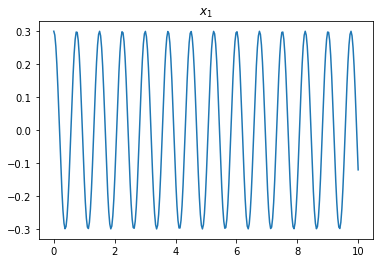

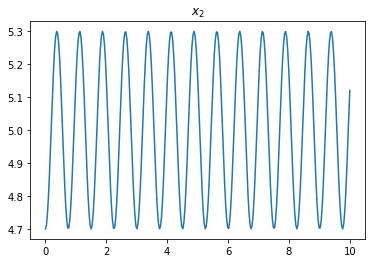

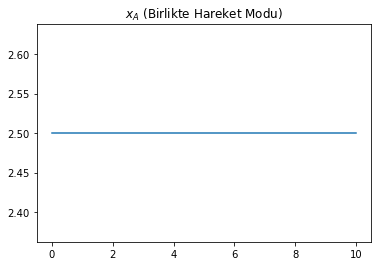

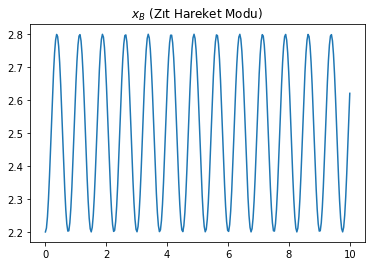

In [11]:
import numpy as np
import matplotlib.pyplot as plt

k=10 # N/m
K=30 # N/m

m = 1 # kg

x1_0 =  0.3 # m
x2_0 = -0.3 # m
v1_0 = 0 # m/s
v2_0 = 0 # m/s

x2_0_x1_0a_gore = 5

w_A = np.sqrt(k/m)
w_B = np.sqrt((k+2*K)/m)

N = 300
t=np.linspace(0,10,N)

"""
A_A = -np.sqrt(((x1_0 + x2_0)/2)**2 + (-(v1_0+v2_0)/(2*w_A))**2)
if(A_A == 0):
    phi_A = 0
else:
    phi_A = np.arccos((x1_0 + x2_0)/(2*A_A))
print("A_A, phi_A: ",A_A,phi_A)

A_B = -np.sqrt(((x2_0 - x1_0)/2)**2 + (-(v2_0-v1_0)/(2*w_B))**2)
if(A_B == 0):
    phi_B = 0
else:
    phi_B = np.arccos((x2_0 - x1_0)/(2*A_B))
print("A_B, phi_B: ",A_B,phi_B)

x1 = A_A*np.cos(w_A*t+phi_A) - A_B*np.cos(w_B*t+phi_B)
x2 = x2_0_x1_0a_gore + \
     A_A*np.cos(w_A*t+phi_A) + A_B*np.cos(w_B*t+phi_B)
"""

# Alternatif Formulasyon
a = (x1_0+x2_0)/2
b = - (v1_0+v2_0)/(2*w_A)
c = (-x1_0+x2_0)/2
d = (v1_0-v2_0)/(2*w_B)

x1=a*np.cos(w_A*t)-b*np.sin(w_A*t)-c*np.cos(w_B*t)+d*np.sin(w_B*t)
x2=x2_0_x1_0a_gore+\
   a*np.cos(w_A*t)-b*np.sin(w_A*t)+c*np.cos(w_B*t)-d*np.sin(w_B*t)

plt.plot(t,x1)
plt.title("$x_1$")
plt.show()

plt.plot(t,x2)
plt.title("$x_2$")
plt.show()

xA = (x1+x2)/2
xB = (x2-x1)/2

plt.plot(t,xA)
plt.title("$x_A$ (Birlikte Hareket Modu)")
plt.show()

plt.plot(t,xB)
plt.title("$x_B$ (Zıt Hareket Modu)")
plt.show()

# Asıl Grafikler, Simülasyon, vs.

Hareketli simülasyonumuzu çizgi-film mantığıyla, ekran üzerinde peş peşe grafikleri yenileyerek gerçekleştirdiğimizden, Jupyter bu iş için pek uygun değil (burada yapacak olursak alt alta çizecek); bu nedenle, aşağıdaki kod ekrana çizdirmek yerine "out" klasörüne (veya sizin `cikti_klasoru` olarak tanımladığınız klasöre) kaydeder.

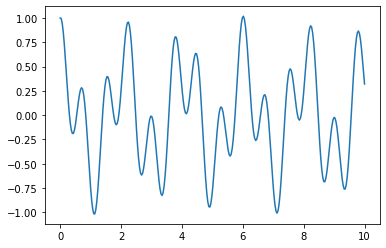

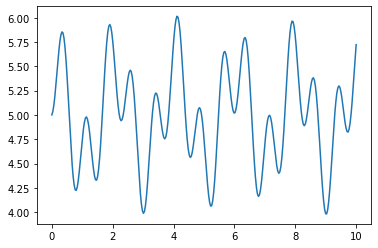

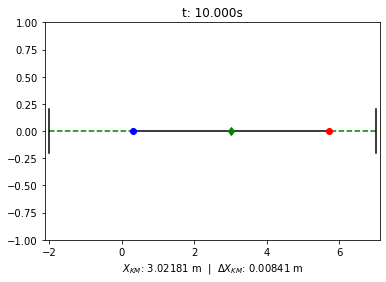

In [12]:
import numpy as np
import matplotlib.pyplot as plt

k=10 # N/m
K=30 # N/m

m = 1 # kg
# 1.0, 1.3, -0.8, 1.2
x1_0 = 1 # m
x2_0 = 0.0 # m
v1_0 = 0.5 # m/s
v2_0 = 0.5 # m/s

x2_0_x1_0a_gore = 5

w_A = np.sqrt(k/m)
w_B = np.sqrt((k+2*K)/m)

N = 300
t=np.linspace(0,10,N)

"""
A_A = -np.sqrt(((x1_0 + x2_0)/2)**2 + ((v1_0+v2_0)/(2*w_A))**2)
if(A_A == 0):
    phi_A = 0.
else:
    phi_A = np.arccos((x1_0 + x2_0)/(2*A_A))
print("A_A, phi_A: ",A_A,phi_A,np.rad2deg(phi_A))

A_B = -np.sqrt(((x2_0 - x1_0)/2)**2 + ((v2_0-v1_0)/(2*w_B))**2)
if(A_B == 0):
    phi_B = np.pi/2
else:
    phi_B = np.arccos((x2_0 - x1_0)/(2*A_B))
print("A_B, phi_B: ",A_B,phi_B,np.rad2deg(phi_B))

x1 = A_A*np.cos(w_A*t+phi_A) - A_B*np.cos(w_B*t+phi_B)
x2 = x2_0_x1_0a_gore + \
A_A*np.cos(w_A*t+phi_A) + A_B*np.cos(w_B*t+phi_B)
"""

# Alternatif formulasyon
a = (x1_0+x2_0)/2
b = - (v1_0+v2_0)/(2*w_A)
c = (-x1_0+x2_0)/2
d = (v1_0-v2_0)/(2*w_B)

x1=a*np.cos(w_A*t)-b*np.sin(w_A*t)-c*np.cos(w_B*t)+d*np.sin(w_B*t)
x2=x2_0_x1_0a_gore+\
   a*np.cos(w_A*t)-b*np.sin(w_A*t)+c*np.cos(w_B*t)-d*np.sin(w_B*t)

plt.plot(t,x1)
plt.show()

plt.plot(t,x2)
plt.show()

import os
# cikti_klasoru'nde tanımlı klasör yoksa, onu oluştur
cikti_klasoru = "out"
if(not os.path.exists(cikti_klasoru)):
    os.makedirs(cikti_klasoru)

minmin = np.min(x1)-1
maxmax = np.max(x2)+1
x_KM0 = (x1[0]+x2[0])/2
for step in np.arange(x1.size):
    #print (step,x1.size-step,t[step])
    plt.clf()
    #plt.figure(facecolor='white')
    plt.plot([x1[step],x2[step]],[0,0],"k-")
    plt.plot([minmin,x1[step]],[0,0],"g--")
    plt.plot([maxmax,x2[step]],[0,0],"g--")
    plt.plot([minmin,minmin],[-0.2,0.2],"k-")
    plt.plot([maxmax,maxmax],[-0.2,0.2],"k-")
    plt.plot(x1[step],0,"ob",x2[step],0,"or")
    x_KM = (x1[step]+x2[step])/2
    Delta_x_KM = x_KM - x_KM0
    x_KM0 = x_KM
    plt.plot(x_KM,0,"dg")
    plt.xlim(minmin-0.1,maxmax+0.1)
    plt.ylim(-1,1)
    plt.title("t: %.3fs"%(t[step]))
    plt.xlabel(r"$X_{KM}$: %.5f m  |  $\Delta X_{KM}$: %.5f m"%(x_KM,Delta_x_KM))
    #plt.show()
    plt.savefig(cikti_klasoru+"/{:04d}.png".format(step),facecolor="white")
